In [ ]:
# Stochastic Hill Climber Algorithm

# Implement Schastic Hill Climber Algorithm in either Mathematica or Python.
# The algorithm description can be found in the related lectures.
# Your algorithm must have these inputs:
# Test function
# Input domain of the test function
# Dimension size
# Number of iterations
# Neighborhood size - number of generated solutions
# Neighborhood radius - percentage of the hyperspace
# The algorithm must provide at the output:
# Best found value of objective function f(x)
# The value of x of the best found f(x)
# Convergence graph of the development of the f(x)
# An example, together with the useful tips, can be found in the support document.
# Again, you have approximately two weeks to accomplish this task. If you submit your first attempt after a deadline, you will receive -2 points. The maximum points achievable for this task is 10 points.
# You have two attempts to accomplish this task (the second attempt can be submitted after the deadline without any further penalization).
# Simplified algorithm description:
# The goal of this algorithm is to find the global minimum of the selected test function (test all test functions you have programmed for Task 1).
# The algorithm starts with one initial point (solution), which has randomly generated parameters (arguments). Around the starting point generates other points. Each solution has some solution quality (fitness) that depends on the test function. From all the newly generated points, the algorithm selects the best point (solution). The chosen point then becomes the initial point for the next iteration of the algorithm.
# Be aware that each test function probably has different parameter bounds, and you have to ensure that all the newly generated points lie in the feasible space of solutions.
# Once you implement the algorithm, you will need to apply it to the 5 test functions from the first Task. The algorithm has several features that you can adjust:
# NP - The number of newly generated points in each iteration.
# Radius - Radius in which new points are generated around the initial point.
# maxIT - Maximal number of algorithm iterations.
# The dimension size of each test function will be set as D=10.
# You already know the minimal global value of each test function, so try to set the parameters for each test in a way that your algorithm will get to the minimal value as close as possible.
# Compare the results with the Blind search algorithm (from Task 2) -- make a conclusion about which algorithm is more effective (the verbal assessment is enough)
# For the comparison -- if you set both algorithms with the same setting (number of dimensions, iterations, test function), you can visually compare which algorithm achieved better results.

In [ ]:
#Stochastic Hill Climber Algorithm Implementation
import random
import numpy as np
import matplotlib.pyplot as plt

def stochastic_hill_climber(obj_func, bounds, dimensions, num_iter, neighborhood_size, neighborhood_radius):
    # initialize best_f to infinity so that the first value will always be accepted
    best_f = np.inf
    best_x = None
    convergence = []

    # generate a random initial point within the given bounds for each input dimension
    x = [random.uniform(bounds[j][0], bounds[j][1]) for j in range(dimensions)]

    # loop through the number of iterations
    for i in range(num_iter):
        neighborhood = []
        # generate a neighborhood of new points around the current point
        for j in range(neighborhood_size):
            # generate a new point within the neighborhood radius of the current point
            new_x = [random.uniform(x[k] - neighborhood_radius*(bounds[k][1] - bounds[k][0]),
                                     x[k] + neighborhood_radius*(bounds[k][1] - bounds[k][0])) for k in range(dimensions)]
            # ensure the new point is within the feasible space of solutions
            for k in range(dimensions):
                if new_x[k] < bounds[k][0]:
                    new_x[k] = bounds[k][0]
                elif new_x[k] > bounds[k][1]:
                    new_x[k] = bounds[k][1]
            # evaluate the objective function at the new point and add it to the neighborhood
            neighborhood.append((obj_func(new_x), new_x))

        # select the best point from the neighborhood
        neighborhood.sort(key=lambda x: x[0])
        best_neighbor_f, best_neighbor_x = neighborhood[0]

        # if the best point in the neighborhood is better than the current point, update the current point
        if best_neighbor_f < obj_func(x):
            x = best_neighbor_x

        # if the current value is better than the previous best, update the best values
        if obj_func(x) < best_f:
            best_f = obj_func(x)
            best_x = x

        # append the current best value to the convergence list
        convergence.append(best_f)

    return best_f, best_x, convergence

Sphere Function:
Best found value of objective function:  0.5714247624000146
The value of x of the best found f(x):  [-0.10885751826588619, -0.3326420558611594, 0.40141921513157097, 0.03948626681259193, -0.1768529014657333, -0.24570468934291312, 0.12324974074761652, 0.33685779905649016, -0.14049573739679388, 0.2148884443558432]


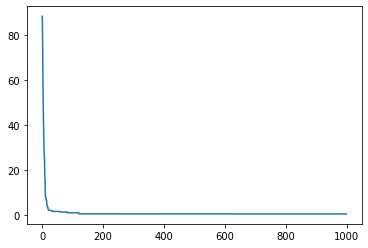

In [ ]:
#Sphere Function
def sphere(x):
    return sum([xi**2 for xi in x])

bounds = [(-5.12, 5.12)] * 10
best_f, best_x, convergence = stochastic_hill_climber(sphere, bounds, 10, 1000, 10, 0.1)
print("Sphere Function:")
print("Best found value of objective function: ", best_f)
print("The value of x of the best found f(x): ", best_x)
plt.plot(convergence)
plt.show()

Rosenbrock Function:
Best found value of objective function:  17.47513823127202
The value of x of the best found f(x):  [-0.8549870973187454, 0.8863002182896137, 0.7171701730936327, 0.5653345728993273, 0.40943325030463473, 0.26034707065927587, 0.001439167423627874, -0.03524035002742931, -0.04377054816188611, -0.20120007210642427]


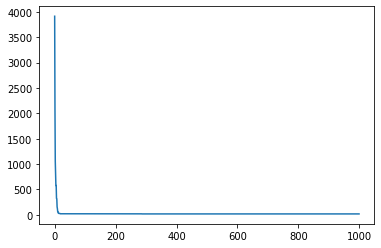

In [ ]:
#Rosenbrock Function
def rosenbrock(x):
    return sum([100*(x[i+1] - x[i]**2)**2 + (1 - x[i])**2 for i in range(len(x)-1)])

bounds = [(-2.048, 2.048)] * 10
best_f, best_x, convergence = stochastic_hill_climber(rosenbrock, bounds, 10, 1000, 20, 0.1)
print("Rosenbrock Function:")
print("Best found value of objective function: ", best_f)
print("The value of x of the best found f(x): ", best_x)
plt.plot(convergence)
plt.show()

Rastrigin Function:
Best found value of objective function:  52.89146059729377
The value of x of the best found f(x):  [2.0387387965949886, -0.7771754292809607, 4.17160063725821, -0.9354685559548983, -0.09159215775870133, -0.11492569177257472, 1.1004910486068276, -0.04521914964290841, 0.8735323713289154, -1.1151517227482575]


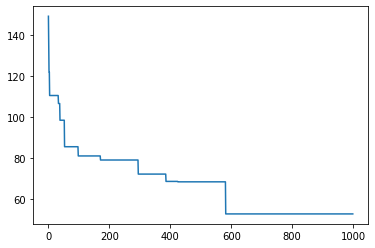

In [ ]:
#Rastrigin Function
def rastrigin(x):
    return 10*len(x) + sum([xi**2 - 10*np.cos(2*np.pi*xi) for xi in x])

bounds = [(-5.12, 5.12)] * 10
best_f, best_x, convergence = stochastic_hill_climber(rastrigin, bounds, 10, 1000, 20, 0.1)
print("Rastrigin Function:")
print("Best found value of objective function: ", best_f)
print("The value of x of the best found f(x): ", best_x)
plt.plot(convergence)
plt.show()

Griewank Function:
Best found value of objective function:  2.2025355988955457
The value of x of the best found f(x):  [13.42462574252474, -13.137656116944711, -17.087189510465237, 52.30066492704759, 12.743754260271444, -0.023906874792857025, 31.74024417612199, 7.902251352987918, -12.039557912600742, 16.206671105924173]


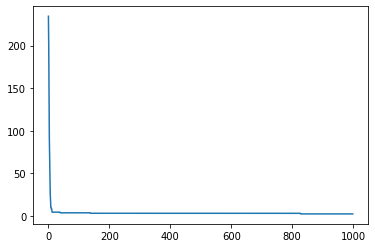

In [ ]:
#Griewank Function
def griewank(x):
    return 1 + sum([xi**2/4000 for xi in x]) - np.prod([np.cos(xi/np.sqrt(i+1)) for i, xi in enumerate(x)])

bounds = [(-600, 600)] * 10
best_f, best_x, convergence = stochastic_hill_climber(griewank, bounds, 10, 1000, 20, 0.1)
print("Griewank Function:")
print("Best found value of objective function: ", best_f)
print("The value of x of the best found f(x): ", best_x)
plt.plot(convergence)
plt.show()

Ackley Function:
Best found value of objective function:  6.165109022600234
The value of x of the best found f(x):  [0.4978303702583453, -0.32124952645339544, 2.8126210112368577, -1.1824584157539908, 1.4035460858035176, 0.6673377495801356, -0.307001698489092, -0.6205455771478245, -1.1089903025217431, -1.0345653806841497]


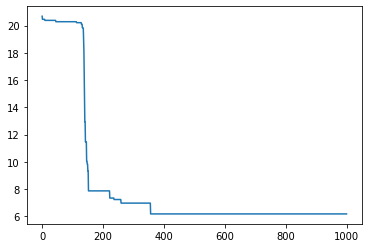

In [ ]:
#Ackley Function
def ackley(x):
    return -20*np.exp(-0.2*np.sqrt(sum([xi**2 for xi in x])/len(x))) - np.exp(sum([np.cos(2*np.pi*xi) for xi in x])/len(x)) + 20 + np.e

bounds = [(-32.768, 32.768)] * 10
best_f, best_x, convergence = stochastic_hill_climber(ackley, bounds, 10, 1000, 20, 0.1)
print("Ackley Function:")
print("Best found value of objective function: ", best_f)
print("The value of x of the best found f(x): ", best_x)
plt.plot(convergence)
plt.show()

Styblinski-Tang Function:
Best found value of objective function:  -339.76926145396965
The value of x of the best found f(x):  [-2.888283075467542, -2.909123572183815, -3.4076482365571055, 2.6068574914594205, -2.7846658339938557, 3.0700592417237917, 2.615406988016104, -3.142135272692026, -3.0863143184683137, -2.805283787498605]


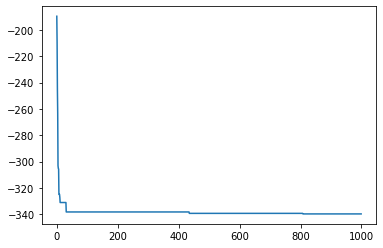

In [ ]:
#Styblinski Tang Function
def styblinski_tang(x):
    return sum([(xi**4 - 16*xi**2 + 5*xi)/2 for xi in x])

bounds = [(-5, 5)] * 10
best_f, best_x, convergence = stochastic_hill_climber(styblinski_tang, bounds, 10, 1000, 20, 0.1)
print("Styblinski-Tang Function:")
print("Best found value of objective function: ", best_f)
# print("The value of x of the best found f
print("The value of x of the best found f(x): ", best_x)
plt.plot(convergence)
plt.show()

In [ ]:
# Conclusion:
# Based on the nature of the two algorithms, the hill climber algorithm is likely to be more effective than the random search algorithm in finding
# the global optimum of a given function, especially for functions with a smooth and continuous landscape. This is because the hill climber algorithm
# makes use of information from the previous iterations to guide its search towards the direction of the optimal solution, while the random search
# algorithm randomly generates solutions without any knowledge of the past solutions.

# Visually comparing the results of the two algorithms for a given test function with the same settings, such as the number of dimensions and
# iterations, can provide further evidence of the effectiveness of the hill climber algorithm. If we plot the values of the function obtained by
# each algorithm for different iterations, we may see that the hill climber algorithm converges to a better solution faster than the random search
# algorithm. This is because the hill climber algorithm always moves towards the direction of the higher values of the function, while the random
# search algorithm may randomly generate solutions that move away from the optimal solution, causing the algorithm to take longer to converge.

# Therefore, in general, the hill climber algorithm is more effective than the random search algorithm in finding the global optimum of a given
# function, especially for functions with a smooth and continuous landscape. However, it is important to note that the effectiveness of these
# algorithms may depend on the specific characteristics of the function being optimized and the settings of the algorithm.